In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from vespa.populations import BEBPopulation
from vespa.populations import PopulationSet

from vespa.transit_basic import MAInterpolationFunction


import logging
rootLogger = logging.getLogger()
rootLogger.setLevel(logging.INFO)

np.seterr(divide = 'ignore', invalid='ignore') 

import warnings
warnings.simplefilter("error")
warnings.simplefilter("ignore", DeprecationWarning)

MAfn = MAInterpolationFunction(pmin=0.01, pmax=10,nps=400,nzs=400)
from astropy import constants as const
Rear = const.R_earth
Rsun = const.R_sun

mK,bin − mK,target = ΔmK 􏷮 −2.5 log10(δ)

In [7]:
from astropy import units as u
from astropy.coordinates import SkyCoord
def radec(ra,dec):    
    return SkyCoord(ra,dec).ra.degree, SkyCoord(ra,dec).dec.degree

In [17]:
def mag_range(mag,d1=1e-2,d2=1e-4):
    return mag-2.5*np.log10(d1),mag-2.5*np.log10(d2)

In [19]:
ra,dec = radec('18h52m51.06s', '+45d20m59.5s')
mags = dict({'J': 12.256, 'g': 14.417 , 'i': 13.429, 
             'K': 11.659, 'r': 13.654, 
             'Kepler': 13.725, 'H': 11.739, 'z': 13.302})
n = 2e4

max_mag,min_mag = mag_range(mags['Kepler'])

param = {'maglim':min_mag}

bebpop = BEBPopulation(trilegal_filename='kepler-62_starfield.h5', 
                       ra=ra, dec=dec, mags=mags, n=n,MAfn=MAfn,**param,period=15)

t0 = time.time()
bebpop.fit_trapezoids(MAfn=MAfn)
t1 = time.time()

INFO:root:Getting TRILEGAL simulation at 283.21274999999997, 45.34986111111111...
INFO:root:Done.
INFO:root:100 binaries are "too close"; gave up trying to fix.
INFO:root:2009 BEB systems generated (target 20000)
INFO:root:1083 binaries are "too close"; gave up trying to fix.
INFO:root:23639 BEB systems generated (target 20000)
INFO:root:Fitting trapezoid models for BEBs...
INFO:root:Done.hape parameters for 20000 systems:  99% |\\\\\\\ | ETA:  0:00:00


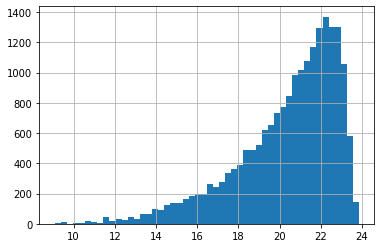

In [20]:
bebpop.stars.Kepler_mag.hist(bins=50)

In [23]:
max_mag

18.725

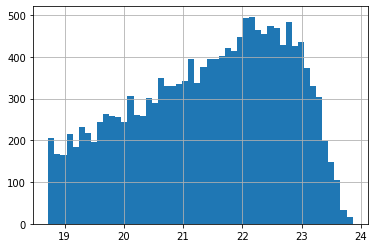

In [26]:
(bebpop.stars[bebpop.stars.Kepler_mag>max_mag]).Kepler_mag.hist(bins=50)

In [27]:
bebpop.stars[bebpop.stars.Kepler_mag>max_mag]

,level_0,age_A,mass_A,radius_A,logL_A,logg_A,Teff_A,g_mag,g_mag_A,r_mag,...,mass_1,radius_1,mass_2,radius_2,Rsky,depth,duration,slope,secdepth,secondary
0,0,9.667287,0.15839,0.164122,-2.236380,4.990000,3936.139984,24.418552,24.849502,23.094534,...,0.15839,0.164122,0.130585,0.136771,2.648032,0.058423,0.029349,2.965406,0.000000,False
4,4,9.667287,0.71594,0.664527,-0.415616,4.647919,5578.567281,20.611595,20.619419,20.111580,...,0.71594,0.664527,0.276714,0.269486,7.090995,0.004990,0.049514,2.324058,0.000000,True
5,5,9.667287,0.62515,0.577277,-0.694754,4.711283,5096.615449,23.592881,23.610733,22.933403,...,0.62515,0.577277,0.261561,0.256601,8.986999,0.186847,0.104877,2.458523,0.015147,False
6,6,9.667287,0.22435,0.227394,-2.085009,4.990000,3648.351197,24.368940,24.658836,22.842919,...,0.22435,0.227394,0.148694,0.163322,4.764258,0.403032,0.092048,2.325809,0.267698,False
7,7,9.667287,0.55511,0.523244,-0.950731,4.745039,4619.821373,22.376667,22.383187,21.501963,...,0.55511,0.523244,0.132104,0.144803,2.853084,0.010905,0.079149,2.481916,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,17986,9.667287,0.31099,0.294555,-1.762454,4.992480,3859.167627,24.564164,24.833139,23.174644,...,0.31099,0.294555,0.190872,0.198213,4.861701,0.044612,0.041338,2.279560,0.007406,False
19996,17987,9.510000,0.33152,0.324492,-1.860622,4.936170,3501.000000,22.179408,22.553543,20.751409,...,0.33152,0.324492,0.234898,0.243318,5.901043,0.234763,0.081494,2.344215,0.063694,False
19997,17988,9.667287,0.67347,0.610168,-0.463949,4.695487,5662.321791,20.497036,20.543463,20.020139,...,0.67347,0.610168,0.390294,0.350078,8.944011,0.060017,0.084398,2.447222,0.000078,True
19998,17989,9.667287,0.19851,0.216014,-2.318114,4.990000,3501.000000,25.316839,25.699545,23.837553,...,0.19851,0.216014,0.135122,0.156020,7.121413,0.000015,0.024845,4.558148,0.000072,False
